In [1]:
from google.colab import files 
  
  
uploaded = files.upload()


import pandas as pd 
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Saving employees.csv to employees.csv


In [2]:
df = pd.read_csv(io.BytesIO(uploaded["employees.csv"]))
print(df)

    First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
1       Thomas    Male   3/31/1996         6:53 AM   61933    4.170   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
..         ...     ...         ...             ...     ...      ...   
995      Henry     NaN  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

    Senior Management                  Team  
0                True             Marketing  
1                True                   NaN  
2        

In [3]:
#realizamos el encabezado de las variables para identificar lo que se tiene en la base de datos

df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [4]:
# Identificamos el tipo de dato que tenemos en las base de datos

print(df.dtypes)

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object


In [5]:
# Mostramos la informaciòn que ayuda a analizar el numero de nulos y no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
# sumamos la cantidad de nulos que contiene nuestra base para identificar los datos que debemos organizar y reemplazar

df.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [7]:
# al identificar la cantidad de datos verificamos que en la variable first name tenemos 67 datos nulos, los cuales podemos reemplazzar o anular, dependiendo del analisis, 
# en este caso el nombre no es indispensable pero podemos reemplazar los datos nulos con un dato de desconocido para no afectar las demas variables
df["First Name"].fillna("desconocido", inplace = True)
df.isnull().sum()

First Name             0
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [8]:
# al identificar la cantidad de datos verificamos que en la variable Gender tenemos 145 datos nulos, los cuales podemos reemplazzar o anular, dependiendo del analisis, 
# en este caso el genero puede ser una variable que nos puede ayudar a verificar el rango entre hombres o mujeres, en este caso lo podemos reemplazar con un dato de otro, 
 #teniendo en cuenta que no son muchos los casos, si se considera el tamaño de los datos.

df["Gender"].fillna("0tro", inplace = True)
df.isnull().sum()

First Name            0
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [9]:
# De acuerdo a los datos que ya hemos reemplazo encontramos 67 datos nulos en la variable Senior Management, la cual se identifica con datos de true o false, 
# esto nos ayuda a reemplzar de una manera más facil los datos con una moda entre los datos 


mode = df["Senior Management"].mode().values[0]
df["Senior Management"]= df["Senior Management"].replace(np.nan, mode)
df.isnull().sum()

First Name            0
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [10]:
# Para terminar con la organización de los datos tenemos la variable team, la cual se va a transformar en una variable numerica, la cual nos permitir promediarla y poder reemplazar los datos
# con el resultado
#df["Team"]= df["Team"].astype("category")

Team_= {"Marketing":1, "Finance": 2,"Client Services":3,"Legal":4,"Product":5, "Engineering":6, "Business Development":7, "Human Resources":8, "Sales":9, "Distribution":10}
df["Team_code"]= df["Team"].map(Team_)

print(df.dtypes)

df.head()


First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management       bool
Team                  object
Team_code            float64
dtype: object


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Team_code
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing,1.0
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance,2.0
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance,2.0
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services,3.0


In [16]:
# al realizar el cambio de variable de categorica a numerico ya se puede realizar un mode de la variable y de esta manera ajustar los datos que tenemos nulos
df= df.dropna(axis=0, how= "any")
print(df.isnull().sum())
df.shape

mode= df["Team_code"].mode().values[0]
df["Team_code"]=df["Team_code"].replace(np.nan,mode)

print(df.isnull().sum())
df.head

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
Team_code            0
dtype: int64
First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
Team_code            0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<bound method NDFrame.head of     First Name  Gender  Start Date Last Login Time  Salary  Bonus %  \
0      Douglas    Male    8/6/1993        12:42 PM   97308    6.945   
2        Maria  Female   4/23/1993        11:17 AM  130590   11.858   
3        Jerry    Male    3/4/2005         1:00 PM  138705    9.340   
4        Larry    Male   1/24/1998         4:47 PM  101004    1.389   
5       Dennis    Male   4/18/1987         1:35 AM  115163   10.125   
..         ...     ...         ...             ...     ...      ...   
995      Henry    0tro  11/23/2014         6:09 AM  132483   16.655   
996    Phillip    Male   1/31/1984         6:30 AM   42392   19.675   
997    Russell    Male   5/20/2013        12:39 PM   96914    1.421   
998      Larry    Male   4/20/2013         4:45 PM   60500   11.985   
999     Albert    Male   5/15/2012         6:24 PM  129949   10.169   

     Senior Management                  Team  Team_code  
0                 True             Marketing        1.0  
2

In [17]:
#Usando 'values_count()' se puede determinar el número de categorías en una variable
# mediante el uso de '.groupby()' se pueden determinar las estadísticas de resumen de cada 
#categoría para todas las variables. 
df["Bonus %"].value_counts()
df.groupby(["Bonus %"]).describe()

Salary                                                        \
         count      mean std       min       25%       50%       75%   
Bonus %                                                                
1.015      1.0   83341.0 NaN   83341.0   83341.0   83341.0   83341.0   
1.017      1.0  141932.0 NaN  141932.0  141932.0  141932.0  141932.0   
1.022      1.0   45724.0 NaN   45724.0   45724.0   45724.0   45724.0   
1.027      1.0   46602.0 NaN   46602.0   46602.0   46602.0   46602.0   
1.079      1.0   75661.0 NaN   75661.0   75661.0   75661.0   75661.0   
...        ...       ...  ..       ...       ...       ...       ...   
19.897     1.0  129968.0 NaN  129968.0  129968.0  129968.0  129968.0   
19.908     1.0   81206.0 NaN   81206.0   81206.0   81206.0   81206.0   
19.930     1.0   85799.0 NaN   85799.0   85799.0   85799.0   85799.0   
19.934     1.0  135490.0 NaN  135490.0  135490.0  135490.0  135490.0   
19.944     1.0  135882.0 NaN  135882.0  135882.0  135882.0  135882.0   

                  Team_code                                          
              max     count  mean std   min   25%   50%   75%   max  
Bonus %                                                              
1.015     83341.0       1.0   3.0 NaN   3.0   3.0   3.0   3.0   3.0  
1.017    141932.0       1.0   6.0 NaN   6.0   6.0   6.0   6.0   6.0  
1.022     45724.0       1.0   5.0 NaN   5.0   5.0   5.0   5.0   5.0  
1.027     46602.0       1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0  
1.079     75661.0       1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0  
...           ...       ...   ...  ..   ...   ...   ...   ...   ...  
19.897   129968.0       1.0   2.0 NaN   2.0   2.0   2.0   2.0   2.0  
19.908    81206.0       1.0  10.0 NaN  10.0  10.0  10.0  10.0  10.0  
19.930    85799.0       1.0   2.0 NaN   2.0   2.0   2.0   2.0   2.0  
19.934   135490.0       1.0   1.0 NaN   1.0   1.0   1.0   1.0   1.0  
19.944   135882.0       1.0   4.0 NaN   4.0   4.0   4.0   4.0   4.0  

[932 rows x 16 columns]

In [13]:
#Para calcular la matriz de correlación, se utiliza la correlación de Spearman Rank 
#ya que las variables no son paramétricas o no son normales. se genera 
# para la matriz de correlación utilizando el paquete Seaborn. 
#Los valores siempre oscilan entre -1 (relación negativa fuerte) y +1 (relación positiva fuerte). 
#Los valores en o cerca de cero implican una relación lineal débil o nula. Los valores del coeficiente de correlación 
#inferiores a +0,8 o superiores a -0,8 no se consideran significativos.

correlacion= df.corr(method="spearman")
correlacion

,Salary,Bonus %,Senior Management,Team_code
Salary,1.000000,-0.036498,0.029191,0.005140
Bonus %,-0.036498,1.000000,-0.045575,-0.023759
Senior Management,0.029191,-0.045575,1.000000,0.042492
Team_code,0.005140,-0.023759,0.042492,1.000000


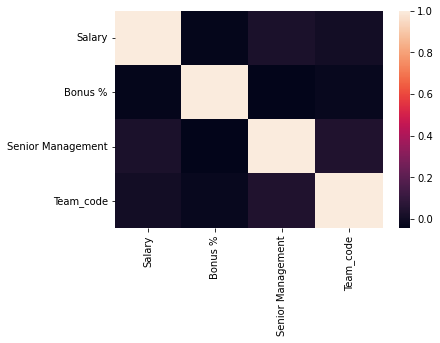

In [14]:
sns.heatmap(correlacion)
plt.show()

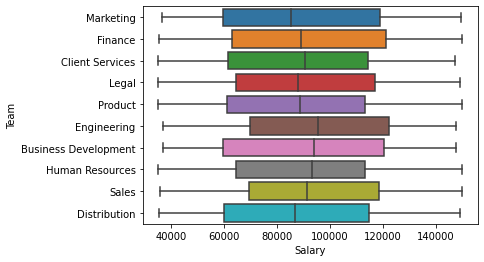

In [26]:
#El diagrama de caja muestra la distribución de datos cuantitativos de una manera que ayuda en la comparación entre variables.
#El diagrama de cuadro es una forma estandarizada de mostrar estadísticas de resumen de las variables y se utiliza 
#principalmente para identificar los valores atípicos en el conjunto de datos.
# Esto nos muestra que el salarario se mantiene en un rango entre 60000 y120000 entre cada uno  de los equipos

sns.boxplot(x="Salary", y="Team", data=df)

plt.show()

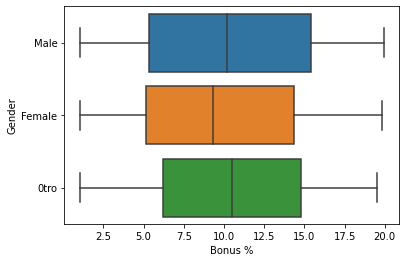

In [29]:
# en este grafico podemos observar el genero en cuanto a las bonificaciones, observando un rango entre el 6% y el 15%, manteniendo se estable entre el minimo y el maximo
# en cada uno de los generos, sin desmeritar el tipo de genero como ta.

sns.boxplot(x="Bonus %", y="Gender", data=df)

plt.show()

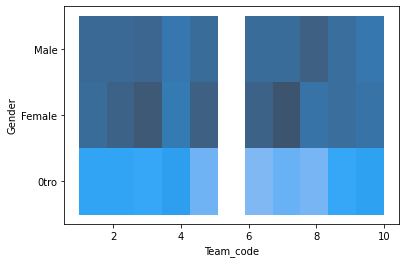

In [44]:
# en este grafico queremos mostrar el numero de personas que tiene cada uno de los equipos como tal, manteniendose en un nivel estandar

sns.histplot(x="Team_code", y="Gender", data=df)

plt.show()